In [1]:
import nltk
import re
from nltk import word_tokenize
import GetOldTweets3 as got
from textblob import TextBlob
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tweepy
import requests

consumer_key=''
consumer_secret= ''
access_token=''
access_token_secret=''
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)


tweetCriteria = got.manager.TweetCriteria().setUsername("@N_Hiranandani")\
                                           .setSince("2019-01-01")\
                                           .setUntil("2019-12-31")\
                                           .setMaxTweets(100000)
tweet = got.manager.TweetManager.getTweets(tweetCriteria)

stat=api.get_status(tweet[0].id)


url = 'http://api.namsor.com/onomastics/api/json/gender/Niranjan/Hiranandani'
response = requests.get(url)
t=response.json()



In [2]:
print("The name of the user is: ",stat.user.name)
print("The location of the user is: ",stat.user.location)
print("The gender of the user is: ",t['gender'])


The name of the user is:  Niranjan Hiranandani
The location of the user is:  Mumbai
The gender of the user is:  male


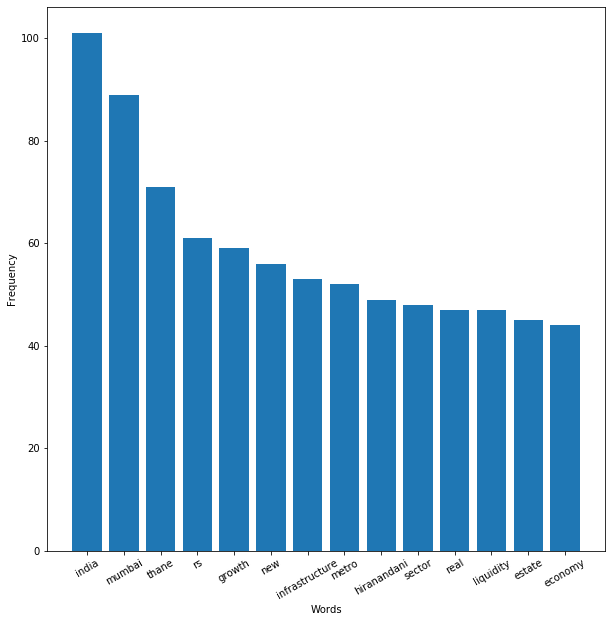

In [3]:
import active
nounlist=list()
for i in tweet:
    try:
        text1 = active.deEmojify(i.text) 
#         print(text1)
        text=active.clean_tweet(text1)
      #  clean.append(text)
        blob = TextBlob(text)
        for nouns in blob.noun_phrases:
            nounlist.append(nouns)
    except Exception as e:
        continue

li1=pd.Series(nounlist)


active.wordcloud(li1)


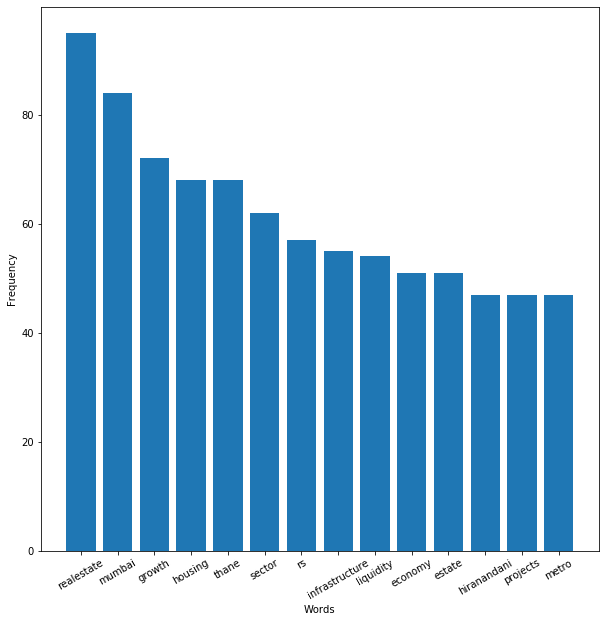

In [4]:
from nltk import word_tokenize
import nltk
nounlist=list()
for i in tweet:
    try:
        text1 = active.deEmojify(i.text) 
        text2=active.clean_tweet(text1)
        text3=text2.replace('&amp;', ' ')
        text=word_tokenize(text3)

        hello=nltk.pos_tag(text)
        #print(hello)
        is_noun = lambda pos: pos[:2] == 'NN'
        nouns = [word for (word, pos) in hello if is_noun(pos)] 
        nounlist.extend(nouns)
    except Exception as e:
        continue
        
        
li1=pd.Series(nounlist)

active.wordcloud(li1)






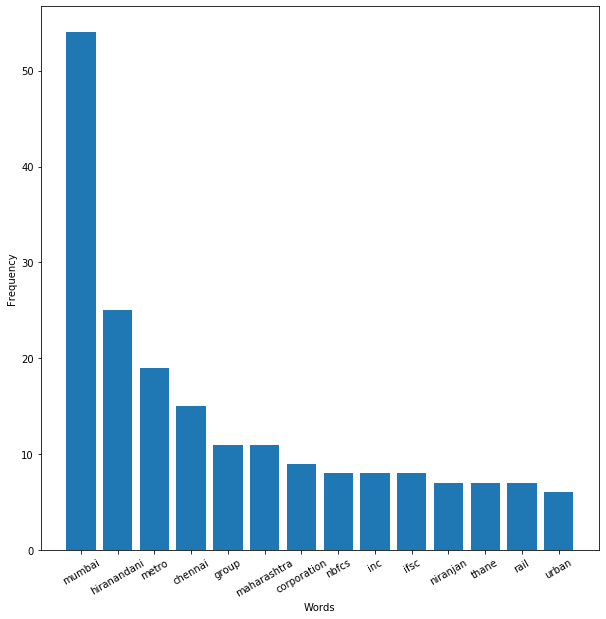

In [5]:
import os
from nltk.tag import StanfordNERTagger
from nltk.tokenize import word_tokenize
os.environ['CLASSPATH'] = "C:/Users/Parth/Contacts/Downloads/stanford-ner-2015-04-20/stanford-ner.jar"

#Set the Stanford models to the path where the models are stored
os.environ['STANFORD_MODELS'] = 'C:/Users/Parth/Contacts/Downloads/stanford-ner-2015-04-20/stanford-corenlp-full-2018-10-05/stanford-corenlp-full-2018-10-05/edu/stanford/nlp/models/ner'

#Set the java jdk path

java_path = "C:/Program Files/Java/jdk1.8.0_131/bin/java.exe"
os.environ['JAVAHOME'] = java_path


#Set the path to the model that you would like to use
stanford_classifier  =  'C:/Users/Parth/Contacts/Downloads/stanford-ner-2015-04-20/stanford-corenlp-full-2018-10-05/stanford-corenlp-full-2018-10-05/edu/stanford/nlp/models/ner/english.all.3class.distsim.crf.ser.gz'

#Build NER tagger object
st = StanfordNERTagger(stanford_classifier)

tweet_text=str()
for i in tweet:
    tweet_text=tweet_text+(i.text)
    

tokenized_text = word_tokenize(tweet_text)
classified_text = st.tag(tokenized_text)

li=['ORG','PER','LOC']

is_noun = lambda pos: pos[:3] in li 
nouns = [word for (word, pos) in classified_text if is_noun(pos)] 
#print(nouns)
noun=pd.Series(nouns)
active.wordcloud(noun)

In [7]:
# -*- coding: utf-8 -*-
"""
Created on Sun Dec 29 22:55:50 2019

@author: Parth
"""
import urllib
import collections
import re
from collections import Counter
import pickle 
import string
import numpy as np
import pandas as pd
from textblob import TextBlob
import tweepy

consumer_key=''
consumer_secret= ''
access_token=''
access_token_secret=''
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth,wait_on_rate_limit=True)

User = "@N_Hiranandani"
# Cursor is the search method this search query will return 20 of the users latest favourites just like the php api you referenced
fav_tweets=list()
author=list()

for favorite in tweepy.Cursor(api.favorites, id=User).items(1000):
    
    #print('\n\n\nTweet Author:')
    # Print the screen name of the tweets auther
    #print('Screen Name: '+str(favorite.user.screen_name.encode("utf-8")))
    #print('Name: '+str(favorite.user.name.encode("utf-8")))
    author.append(favorite.user.screen_name)
    

    #Basic information about the tweet that was favorited
 #   print('\nTweet:')
    # Print the id of the tweet the user favorited
#    print('Tweet Id: '+str(favorite.id))
    # Print the text of the tweet the user favorited
    #print('Tweet Text: '+str(favorite.text.encode("utf-8")))
    fav_tweets.append(favorite)

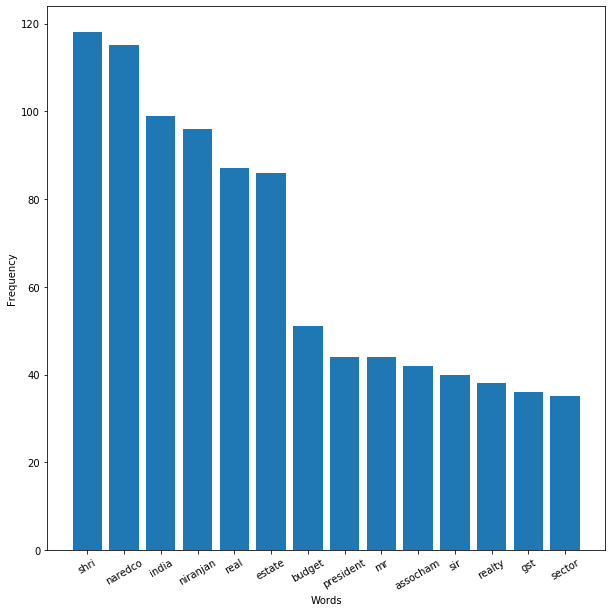

In [8]:
import active
import pandas as pd
from textblob import TextBlob



from nltk import word_tokenize
import nltk
nounlist=list()
for i in fav_tweets:
    try:
        text1 = active.deEmojify(i.text) 
        text2=active.clean_tweet(text1)
        text=text2.replace('&amp;', ' ')
        blob = TextBlob(text)
        for nouns in blob.noun_phrases:
            nounlist.append(nouns)


    except Exception as e:
        continue
        
        
li1=pd.Series(nounlist)

active.wordcloud(li1)


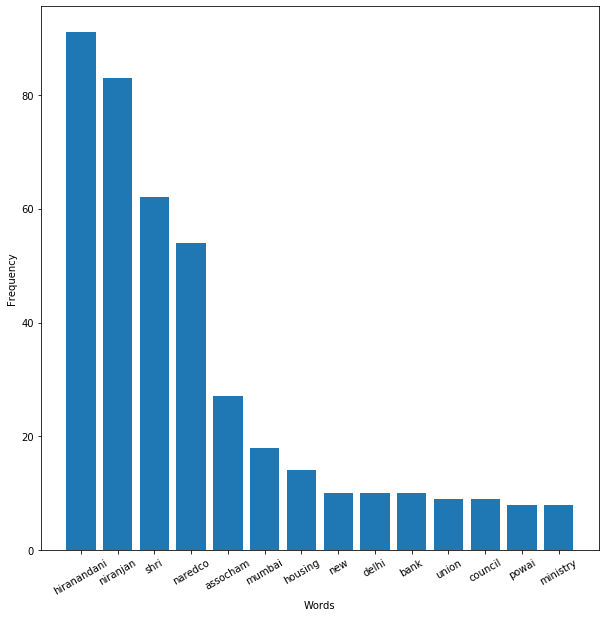

In [9]:
st = StanfordNERTagger(stanford_classifier)

tweet_text=str()
for i in fav_tweets:
    tweet_text=tweet_text+(i.text)
    

tokenized_text = word_tokenize(tweet_text)
classified_text = st.tag(tokenized_text)

li=['ORG','PER','LOC']

is_noun = lambda pos: pos[:3] in li 
nouns = [word for (word, pos) in classified_text if is_noun(pos)] 
#print(nouns)
noun=pd.Series(nouns)
active.wordcloud(noun)

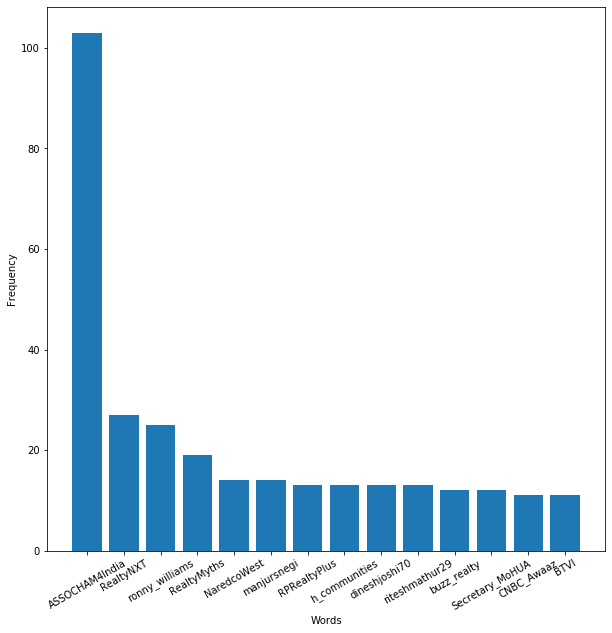

In [10]:
#wordcloud
def wordcloud(negative):
   # hello=[]
    content = ' '.join(negative)    
    tokenized_word = word_tokenize(content)
    stop_words=set(stopwords.words("english"))
    filtered_sent=[]
    for w in tokenized_word:
        if w not in stop_words:
            filtered_sent.append(w)
    fdist = FreqDist(filtered_sent)
    fd = pd.DataFrame(fdist.most_common(15), columns = ["Word","Frequency"]).drop([0]).reindex()
    
    y=fd['Frequency']
    x=fd['Word']
#    print(fd)
    index=np.arange(len(x))
    fig=plt.figure(figsize=(10,10))
    plt.bar(index,y)
    plt.xlabel('Words',fontsize=10)
    plt.ylabel('Frequency',fontsize=10)
    plt.xticks(index,x,fontsize=10,rotation=30)
    plt.show()

    
    

ath=pd.Series(author)
wordcloud(ath)